# Data Collection

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
d = pd.read_csv('insurance.csv')
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing

## Data Visualisation

In [3]:
d.shape

(1338, 7)

In [4]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
d.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

 Therfore the dataset has no missing values

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

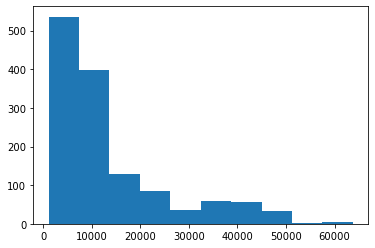

In [6]:
plt.hist(d['charges'])

Threfore this is right skewed

(array([4012754.64762 ,       0.      ,       0.      , 5363689.76329 ,
              0.      ,       0.      , 4035711.99654 ,       0.      ,
              0.      , 4343668.583309]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

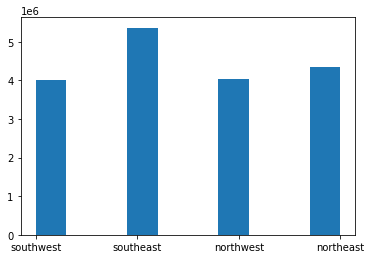

In [7]:
plt.hist(d['region'], weights=d['charges'])

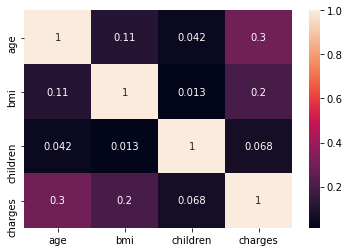

In [8]:
sns.heatmap(d.corr(),annot=True)

In [9]:
d['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
d['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
d['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

## Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
d['sex'] = l1.fit_transform(d['sex'])

In [13]:
l2 = LabelEncoder()
d['smoker'] = l2.fit_transform(d['smoker'])

In [14]:
l3 = LabelEncoder()
d['region'] = l3.fit_transform(d['region'])

## Separating independent and dependent variables

In [15]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
x = d.iloc[:,0:6].values
x

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [17]:
y = d.iloc[:,-1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

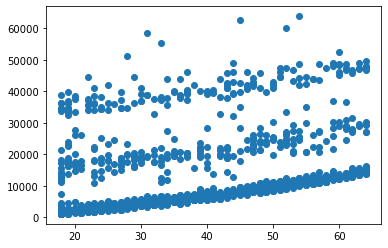

In [18]:
plt.scatter(x[:,0],y)

## OneHot Encooding

In [19]:
import sklearn 
from sklearn.compose import ColumnTransformer #to apply on columns
from sklearn.preprocessing import OneHotEncoder #to convert into binary

In [20]:
ct = ColumnTransformer([("ohe",OneHotEncoder(),[5])],remainder="passthrough")
x = np.array(ct.fit_transform(x))
x

array([[ 0.  ,  0.  ,  0.  , ..., 27.9 ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  , ..., 33.77,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ..., 33.  ,  3.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  1.  , ..., 36.85,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., 25.8 ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 29.07,  0.  ,  1.  ]])

In [21]:
x = x[:,1:]

In [22]:
x[0]

array([ 0. ,  0. ,  1. , 19. ,  0. , 27.9,  0. ,  1. ])

## splitting the data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape, x_test.shape

((1070, 8), (268, 8))

In [25]:
for i in range(0,5):
    print(x_train[i])

[ 0.   0.   1.  37.   1.  34.1  4.   1. ]
[ 0.    1.    0.   18.    1.   34.43  0.    0.  ]
[ 0.    0.    0.   23.    0.   36.67  2.    1.  ]
[ 0.   0.   1.  32.   1.  35.2  2.   0. ]
[ 0.     0.     0.    58.     0.    32.395  1.     0.   ]


In [26]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Standard Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [28]:
x_train

array([[-0.55791981, -0.6155209 ,  1.70862925, ...,  0.54530479,
         2.41394802,  1.97125461],
       [-0.55791981,  1.6246402 , -0.58526447, ...,  0.59867181,
        -0.89219519, -0.50729114],
       [-0.55791981, -0.6155209 , -0.58526447, ...,  0.96092064,
         0.76087642,  1.97125461],
       ...,
       [-0.55791981,  1.6246402 , -0.58526447, ..., -0.91339361,
        -0.89219519, -0.50729114],
       [ 1.79237229, -0.6155209 , -0.58526447, ...,  0.77656186,
        -0.89219519, -0.50729114],
       [-0.55791981, -0.6155209 ,  1.70862925, ..., -1.97749955,
        -0.06565939, -0.50729114]])

# Model Building

## Training and Testing the model

applying random forest regression model

In [29]:
# from sklearn.linear_model import LinearRegression
# LR = LinearRegression()
# LR.fit(x_train, y_train)

# from sklearn.tree import DecisionTreeRegressor
# LR=DecisionTreeRegressor(criterion='mse',random_state=0)
# LR.fit(x_train,y_train)

from sklearn.ensemble import RandomForestRegressor
LR = RandomForestRegressor(n_estimators=10,criterion='mse',random_state=0)
LR.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [30]:
y_pred = LR.predict(x_test)
y_pred

array([ 9992.228215 , 10910.717747 , 44933.48562  , 13202.219555 ,
        9347.66464  , 15633.349156 ,  1963.800705 , 15278.544838 ,
        7844.466825 ,  6538.651015 ,  5329.863415 , 18086.752831 ,
        6912.864145 ,  5822.695621 , 23822.565474 , 12121.902109 ,
       12548.93789  ,  5274.047116 ,  6335.576125 , 34048.547525 ,
       23686.03311  , 12744.95898  , 15457.002702 , 27697.884267 ,
        1481.58097  , 12785.405963 ,  5082.969676 , 15646.18089  ,
        3703.99872  , 13876.156516 ,  7766.747585 , 48751.531115 ,
       13193.9804   , 10367.569465 , 15352.33835  ,  3506.342235 ,
        8656.09607  , 37966.058435 , 40952.72354  ,  5867.646553 ,
       11889.303604 ,  2895.56243  , 20166.8244   , 48546.896636 ,
       36914.686575 , 11545.954186 , 12121.902109 ,  6709.372325 ,
        8279.0649   , 13347.439663 ,  2351.11894  , 16952.824753 ,
       26692.231495 , 46707.997007 , 11732.33352  ,  4410.758578 ,
        2490.663105 ,  9296.58623  , 10116.291366 , 21605.8421

## Evaluation

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8462496651461004

In [33]:
LR.predict([[0,1,1,34,1,35,1,1]])

array([56417.903245])

Therefore our model is rougly 85% accurate

In [34]:
import pickle
pickle.dump(LR,open("final.pkl",'wb'))

In [35]:
from joblib import dump
dump(LR,"final.save")

['final.save']